# Import Library dan File csv

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("[Dataset]_(Asuransi).csv")

Saving [Dataset]_(Asuransi).csv to [Dataset]_(Asuransi).csv


# Kondisi tabel awal

In [ ]:
df.head()

,Unnamed: 0,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,insured_sex_FEMALE,insured_sex_MALE,...,months_as_customer_groups_301-350,months_as_customer_groups_351-400,months_as_customer_groups_401-450,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low
0,0,53300,0,5,1,2,71610,1,0,1,...,1,0,0,0,0,0,0,1,0,0
1,1,0,0,8,1,0,5070,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,2,35100,0,7,3,3,34650,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,3,48900,-62400,5,1,2,63400,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,4,66000,-46000,20,1,1,6500,0,0,1,...,0,0,0,0,0,1,0,0,0,0


# Informasi-informasi yang didapat dari tabel

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 69 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Unnamed: 0                              1000 non-null   int64
 1   capital-gains                           1000 non-null   int64
 2   capital-loss                            1000 non-null   int64
 3   incident_hour_of_the_day                1000 non-null   int64
 4   number_of_vehicles_involved             1000 non-null   int64
 5   witnesses                               1000 non-null   int64
 6   total_claim_amount                      1000 non-null   int64
 7   fraud_reported                          1000 non-null   int64
 8   insured_sex_FEMALE                      1000 non-null   int64
 9   insured_sex_MALE                        1000 non-null   int64
 10  insured_occupation_adm-clerical         1000 non-null   int64
 11  insured_occupation

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Unnamed: 0                                0
capital-gains                             0
capital-loss                              0
incident_hour_of_the_day                  0
number_of_vehicles_involved               0
                                         ..
policy_annual_premium_groups_high         0
policy_annual_premium_groups_low          0
policy_annual_premium_groups_medium       0
policy_annual_premium_groups_very high    0
policy_annual_premium_groups_very low     0
Length: 69, dtype: int64

# Proses Clearing Data

In [ ]:
# Penghapusan kolom yang tidak digunakan
df = df.drop(columns=['Unnamed: 0'])

# Clearing data gender
df['insured sex'] = df['insured_sex_MALE'].apply(lambda x: 'Male' if x else 'Female')
df = df.drop(columns=['insured_sex_MALE', 'insured_sex_FEMALE'])

# Clearing data fraud reported
df['fraud reported'] = df['fraud_reported'].apply(lambda x: 'Yes' if x else 'No')
df = df.drop(columns=['fraud_reported'])

# Clearing data jenis pekerjaan
occupation_columns = [
    'insured_occupation_adm-clerical', 'insured_occupation_armed-forces',
    'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
    'insured_occupation_farming-fishing', 'insured_occupation_handlers-cleaners',
    'insured_occupation_machine-op-inspct', 'insured_occupation_other-service',
    'insured_occupation_priv-house-serv', 'insured_occupation_prof-specialty',
    'insured_occupation_protective-serv', 'insured_occupation_sales',
    'insured_occupation_tech-support', 'insured_occupation_transport-moving'
]
def get_occupation(row):
    for col in occupation_columns:
        if row[col] == 1:
            return col.replace('insured_occupation_', '')
    return 'Unknown'
df['occupation'] = df.apply(get_occupation, axis=1)
df = df.drop(columns=occupation_columns)

# Clearing data hobi
hobbies_columns = [
    'insured_hobbies_chess', 'insured_hobbies_cross-fit',
    'insured_hobbies_other'
]
def get_hobbies(row):
    for col in hobbies_columns:
        if row[col] == 1:
            return col.replace('insured_hobbies_', '')
    return 'Unknown'
df['hobbies'] = df.apply(get_hobbies, axis=1)
df = df.drop(columns=hobbies_columns)

# Clearing data jenis kecelakaan
incident_columns = [
    'incident_type_Multi-vehicle Collision', 'incident_type_Parked Car',
    'incident_type_Single Vehicle Collision', 'incident_type_Vehicle Theft'
]
def get_incident(row):
    for col in incident_columns:
        if row[col] == 1:
            return col.replace('incident_type_', '')
    return 'Unknown'
df['incident'] = df.apply(get_incident, axis=1)
df = df.drop(columns=incident_columns)

# Clearing data jenis tabrakan
collision_columns = [
    'collision_type_?', 'collision_type_Front Collision',
    'collision_type_Rear Collision', 'collision_type_Side Collision'
]
def get_collision(row):
    for col in collision_columns:
        if row[col] == 1:
          if col.split('_')[2] == '?':
            return col.replace('collision_type_?', 'other')
          return col.replace('collision_type_', '')
    return 'Unknown'
df['collision'] = df.apply(get_collision, axis=1)
df = df.drop(columns=collision_columns)

# Clearing data tingkat cidera
severity_columns = [
    'incident_severity_Major Damage', 'incident_severity_Minor Damage',
    'incident_severity_Total Loss', 'incident_severity_Trivial Damage'
]
def get_severity(row):
    for col in severity_columns:
        if row[col] == 1:
            return col.replace('incident_severity_', '')
    return 'Unknown'
df['severity'] = df.apply(get_severity, axis=1)
df = df.drop(columns=severity_columns)

# Clearing data pihak yang dihubungi
contacted_columns = [
    'authorities_contacted_Ambulance', 'authorities_contacted_Fire',
    'authorities_contacted_None', 'authorities_contacted_Other',
    'authorities_contacted_Police'
]
def get_contacted(row):
    for col in contacted_columns:
        if row[col] == 1:
            return col.replace('authorities_contacted_', '')
    return 'Unknown'
df['authorities contacted'] = df.apply(get_contacted, axis=1)
df = df.drop(columns=contacted_columns)

# Clearing data umur dalam group
age_columns = [
    'age_group_15-20', 'age_group_21-25',
    'age_group_26-30', 'age_group_31-35',
    'age_group_36-40', 'age_group_41-45',
    'age_group_46-50', 'age_group_51-55',
    'age_group_56-60', 'age_group_61-65'
]
def get_age(row):
    for col in age_columns:
        if row[col] == 1:
            return col.replace('age_group_', ' ')
    return 'Unknown'
df['age'] = df.apply(get_age, axis=1)
df = df.drop(columns=age_columns)

# Clearing data bulan dalam group
months_columns = [
    'months_as_customer_groups_0-50', 'months_as_customer_groups_101-150',
    'months_as_customer_groups_151-200', 'months_as_customer_groups_201-250',
    'months_as_customer_groups_251-300', 'months_as_customer_groups_301-350',
    'months_as_customer_groups_351-400', 'months_as_customer_groups_401-450',
    'months_as_customer_groups_451-500', 'months_as_customer_groups_51-100'
]
def get_months(row):
    for col in months_columns:
        if row[col] == 1:
            return col.replace('months_as_customer_groups_', ' ')
    return 'Unknown'
df['months since joining'] = df.apply(get_months, axis=1)
df = df.drop(columns=months_columns)

# Clearing data policy annual premium dalam group
policy_columns = [
    'policy_annual_premium_groups_high', 'policy_annual_premium_groups_very high',
    'policy_annual_premium_groups_low', 'policy_annual_premium_groups_very low',
    'policy_annual_premium_groups_medium'
]
def get_policy(row):
    for col in policy_columns:
        if row[col] == 1:
            return col.replace('policy_annual_premium_groups_', ' ')
    return 'Unknown'
df['policy annual premium'] = df.apply(get_policy, axis=1)
df = df.drop(columns=policy_columns)

# Mengubah capital-loss menjadi bernilai positif
df['capital-loss'] = df['capital-loss'].apply(lambda x: abs(x) if x < 0 else x)

# Tabel setelah clearing data

In [ ]:
df.head()

,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,insured sex,fraud reported,occupation,hobbies,incident,collision,severity,authorities contacted,age,months since joining,policy annual premium
0,53300,0,5,1,2,71610,Male,Yes,craft-repair,other,Single Vehicle Collision,Side Collision,Major Damage,Police,46-50,301-350,medium
1,0,0,8,1,0,5070,Male,Yes,machine-op-inspct,other,Vehicle Theft,other,Minor Damage,Police,41-45,201-250,medium
2,35100,0,7,3,3,34650,Female,No,sales,other,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,26-30,101-150,medium
3,48900,62400,5,1,2,63400,Female,Yes,armed-forces,other,Single Vehicle Collision,Front Collision,Major Damage,Police,41-45,251-300,medium
4,66000,46000,20,1,1,6500,Male,No,sales,other,Vehicle Theft,other,Minor Damage,None,41-45,201-250,high


In [ ]:
hasil = set()
for i in df['authorities contacted']:
  hasil.add(i)

for i in hasil:
  print(i)

Fire
Other
None
Ambulance
Police


# Grafik terkait data pada tabel

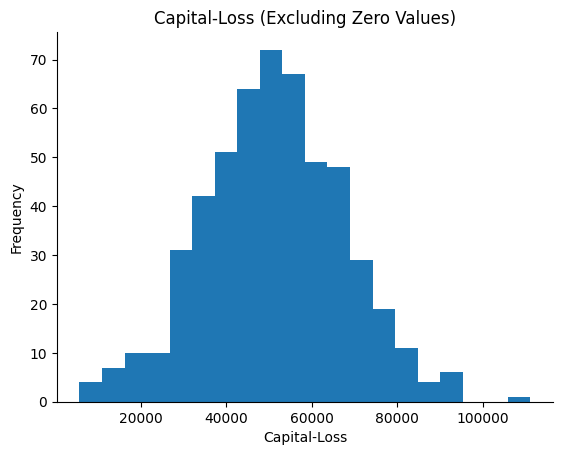

In [ ]:
# Filter out zero values in 'capital-loss'
filtered_data = df[df['capital-loss'] != 0]

# Plot the histogram
filtered_data['capital-loss'].plot(kind='hist', bins=20, title='Capital-Loss (Excluding Zero Values)')
plt.xlabel('Capital-Loss')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

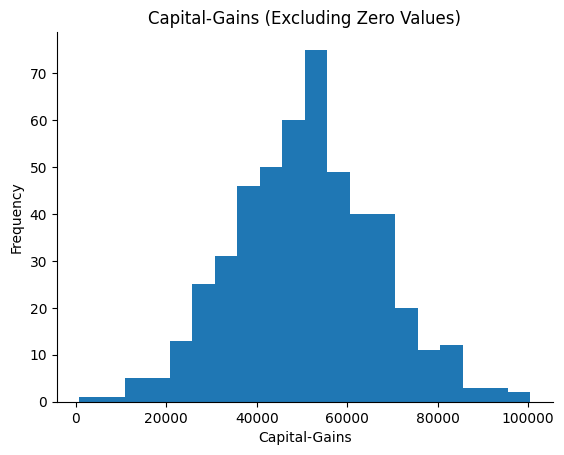

In [ ]:
# Filter out zero values in 'capital-gains'
filtered_data = df[df['capital-gains'] != 0]

# Plot the histogram
filtered_data['capital-gains'].plot(kind='hist', bins=20, title='Capital-Gains (Excluding Zero Values)')
plt.xlabel('Capital-Gains')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

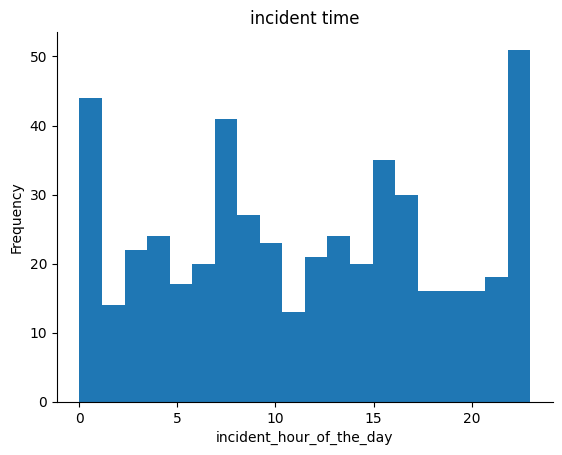

In [ ]:
# Plot the histogram
filtered_data['incident_hour_of_the_day'].plot(kind='hist', bins=20, title='incident time')
plt.xlabel('incident_hour_of_the_day')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

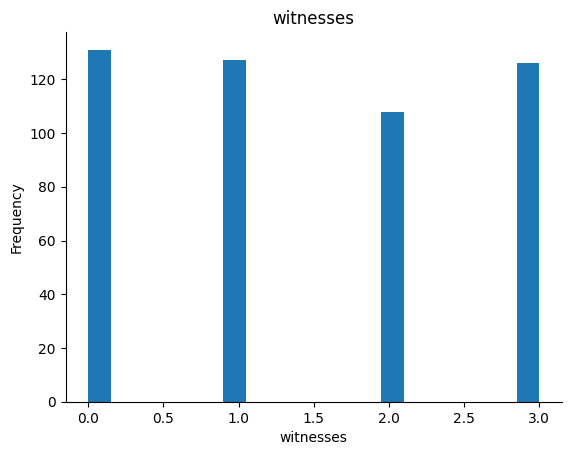

In [ ]:
# Plot the histogram
filtered_data['witnesses'].plot(kind='hist', bins=20, title='witnesses')
plt.xlabel('witnesses')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

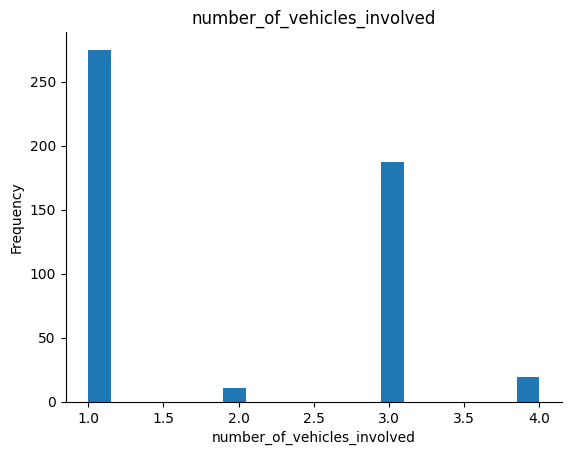

In [ ]:
# Plot the histogram
filtered_data['number_of_vehicles_involved'].plot(kind='hist', bins=20, title='number_of_vehicles_involved')
plt.xlabel('number_of_vehicles_involved')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

# Function Pendeteksi Fraud

In [ ]:
def predict_fraud_with_accuracy(input_data):

    dataProcess = df

    X = dataProcess.drop(columns=['fraud reported'])
    y = dataProcess['fraud reported']

    categorical_cols = X.select_dtypes(include=['object']).columns
    numerical_cols = X.select_dtypes(include=['number']).columns
    numerical_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))
    ])

    print(model_pipeline)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model_pipeline.fit(X_train, y_train)
    sample_df = pd.DataFrame(sample_data_fraud)
    prediction = model_pipeline.predict(sample_df)
    print(prediction)
    y_pred_test = model_pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_test)

    return prediction, accuracy

# Test Case

In [ ]:
# Test Case 1 (Bukan Fraud)
sample_data_fraud = {
    'capital-gains': [35100],
    'capital-loss': [0],
    'incident_hour_of_the_day': [7],
    'number_of_vehicles_involved': [3],
    'witnesses': [3],
    'total_claim_amount': [34650],
    'insured sex': ['Female'],
    'occupation': ['sales'],
    'hobbies': ['other'],
    'incident': ['Multi-vehicle Collision'],
    'collision': ['Rear Collision'],
    'severity': ["Minor Damage"],
    'authorities contacted': ["Police"],
    'age': ['26-30'],
    'months since joining': ['101-150'],
    'policy annual premium': ['medium']
}

is_fraud, model_accuracy = predict_fraud_with_accuracy(sample_data_fraud)
if is_fraud == 'Yes':
    print("Penipuan Asuransi")
else:
    print("Bukan Penipuan Asuransi")
print(f"Akurasi Model: {model_accuracy * 100:.2f}%")

# Test Case 2 (Fraud)
sample_data_fraud = {
    'capital-gains': [53300],
    'capital-loss': [0],
    'incident_hour_of_the_day': [5],
    'number_of_vehicles_involved': [1],
    'witnesses': [2],
    'total_claim_amount': [71610],
    'insured sex': ['Male'],
    'occupation': ['craft-repair'],
    'hobbies': ['other'],
    'incident': ['Single Vehicle Collision'],
    'collision': ['?'],
    'severity': ["Major Damage"],
    'authorities contacted': ["Police"],
    'age': ['46-50'],
    'months since joining': ['301-350'],
    'policy annual premium': ['medium']
}

is_fraud, model_accuracy = predict_fraud_with_accuracy(sample_data_fraud)
if is_fraud == 'Yes':
    print("Penipuan Asuransi")
else:
    print("Bukan Penipuan Asuransi")
print(f"Akurasi Model: {model_accuracy * 100:.2f}%")

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'witnesses', 'total_claim_amount'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['insured sex', 'occupation', 'hobbies', 'incident', 'collision',
       'severity', 'authorities contacted', 'age', 'months since joining',
       'policy annual premium'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])
['No']
Bukan Penipuan Asuransi
Akurasi Model: 79.00%
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                     